## Assigment 5 notebook

#### In this notebook we will the probability exercises in assignment 5.

In [3]:
# load the packages used for calculation and plotting
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as panda

### Exercise 1 (a)

probs: [0.0, 0.029411764705882353, 0.058823529411764705, 0.38235294117647056, 0.2647058823529412, 0.23529411764705882, 0.029411764705882353]
sum of all probablities: 1.0


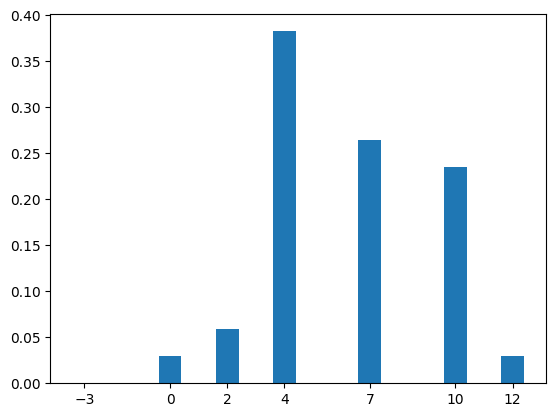

In [39]:
data = panda.read_excel("MASD2024_data.xlsx")

expected_grades = data["What grade do you expect to get in the course?"].tolist()
Rx = [-3, 0, 2, 4, 7, 10, 12]
def p_X(x_k):
    return (expected_grades.count(x_k) / len(expected_grades))

def pmf(pxk: Callable):
    y = []
    for grade in Rx:
        y.append(pxk(grade))
    print("probs:",y)
    print("sum of all probablities:",sum(y))
    plt.bar(Rx, y)
    plt.xticks(Rx)
    plt.show()

pmf(p_X)


### Exercise 1b
We are to find the expected value of X (the grades), we do se by using the sum formula for expectation in lecture1_week6.pdf slide 35

In [40]:
EX = 0
for grade in Rx:
    EX += grade * p_X(grade)
print("Expected value EX:",EX)


Expected value EX: 6.205882352941177


### Exercise 1c
We are to compute the variance of expected grades based on the pmf. We do so by using 